In [1]:
! pip install textblob

You are using pip version 18.0, however version 21.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud as wc

In [3]:
apikey='l8RKHnFrEk3YAVbkbpEb3IhwQ'
apisecret='atxoCPtyGuxy71AwwnpRHGTokawSFRJ03Gj0o0Hj0mABkxLjrD'
accesstoken='952099339177873410-ArREei1PHycrvu1byELJi51wauo2w2C'
accesstokensecret='csXfyp0M0zPZN3o2enDdCClvYV5BSrL42fWSTGsBxQM33'

In [4]:
authenticate=tweepy.OAuthHandler(apikey,apisecret)
authenticate.set_access_token(accesstoken,accesstokensecret)
api=tweepy.API(authenticate)

In [5]:
posts=api.user_timeline(screen_name='@handsome__NERD',count=100,lang='en',tweet_mode='extended')#searching for tweets by twitter handle

In [7]:
i=1
for tweet in posts[:10]:
    print(str(i)+')'+tweet.full_text+'\n')
    i+=1

1)RT @dhruv_rathee: Centre Govt is the only Govt responsible for allocating and distributing oxygen supply in all states of India.

If hospit…

2)RT @kunalkamra88: Bhakts who banged thaalis on their heads also got the virus. Our frontline workers are working relentlessly &amp; I respect t…

3)RT @pbhushan1: #EVM #Democracy
Examiner's car broke down. Examinee gave him a lift &amp; scored 100%! https://t.co/JCduwULzkn

4)RT @Kisanektamorcha: Indian democracy is almost dead!
Inspite of farmers' stating that the fight is between Farm Laws &amp; Govt. And not betwe…

5)RT @SaketGokhale: What sort of weird pathetic flex is this? 

That the Modi govt cares about its international image more than lives of Ind…

6)RT @pbhushan1: Modiji was jailed in India for supporting the liberation of Bangladesh for which our govt went to war with Pakistan! 😛
Just…

7)RT @kunalkamra88: Why is our Fake Hasina trying to appease Sheikh Hasina 😂😂😂

8)RT @dewanshraj1998: @airtelindia @Airtel_Presence when can I e

In [55]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [56]:
df

,Tweets
0,RT @dhruv_rathee: Centre Govt is the only Govt...
1,RT @kunalkamra88: Bhakts who banged thaalis on...
2,RT @pbhushan1: #EVM #Democracy\nExaminer's car...
3,RT @Kisanektamorcha: Indian democracy is almos...
4,RT @SaketGokhale: What sort of weird pathetic ...
5,RT @pbhushan1: Modiji was jailed in India for ...
6,RT @kunalkamra88: Why is our Fake Hasina tryin...
7,RT @dewanshraj1998: @airtelindia @Airtel_Prese...
8,RT @MahuaMoitra: Hon’ble HM says Mamata for Sc...
9,RT @kunalkamra88: You may be the last generati...


In [57]:
#clean the dataframe
def cleanText(text):
    text=re.sub('@[A-Za-z0-9-]+','',text)
    text=re.sub('#','',text)
    text=re.sub('RT[\s]+','',text)
    text=re.sub('_[\S]+','',text)
    text=re.sub('\n','',text)
    text=re.sub('https?:\/\/\S+','',text)
    text=re.sub(':','',text)
    return text
    

In [58]:
df['Tweets']=df['Tweets'].apply(cleanText)

In [59]:
df['Tweets'][0]

' Centre Govt is the only Govt responsible for allocating and distributing oxygen supply in all states of India.If hospit…'

In [60]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

In [61]:
df

,Tweets,Subjectivity,Polarity
0,Centre Govt is the only Govt responsible for ...,0.775000,0.100000
1,Bhakts who banged thaalis on their heads also...,0.000000,0.000000
2,EVM DemocracyExaminer's car broke down. Exami...,0.288889,-0.194444
3,Indian democracy is almost dead!Inspite of fa...,0.000000,0.000000
4,What sort of weird pathetic flex is this? Tha...,0.625000,-0.250000
5,Modiji was jailed in India for supporting the...,0.250000,0.312500
6,Why is our Fake Hasina trying to appease Shei...,1.000000,-0.500000
7,when can I expect the launch of Airtel Xstr...,0.000000,0.000000
8,"Hon’ble HM says Mamata for Scam, Modi for Sch...",1.000000,-0.500000
9,You may be the last generation who has the po...,0.283333,-0.125000


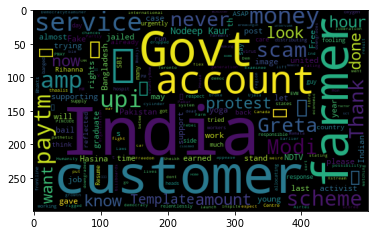

In [62]:
allwords=''.join([i for i in df['Tweets']])
cloud=wc(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)
plt.imshow(cloud)

In [16]:
fetched_tweets = api.search(q = 'Bitcoin', count = 50) #searching tweets by the given keyword

In [42]:
i=1
for tweet in fetched_tweets[:10]:
    print(str(i)+')'+tweet.text+'\n')
    i+=1

1)Ah pero el bitcoin https://t.co/xwHyuBpaO8

2)RT @DocumentingBTC: What do these guys know that you don't? #Bitcoin https://t.co/k7U4pfU2NY

3)#Roubini ataca de nuevo al Bitcoin: Solo es una burbuja
Nouriel Roubini ha vuelto a insistir en una entrevista con… https://t.co/po9OVAt1TH

4)RT @OTC_Bitcoin: It's impossible to know the future!

#bitcoin https://t.co/Zlh5SS9IMT

5)RT @michael_saylor: #Bitcoin mining makes it the superior long-term store of value asset for institutions and a powerful force driving the…

6)#Bitcoin        : 38.620$ 🟢 %1
#Ethereum : 2.753$ 🟢 %1 
#BNB         : 372$ 🟢 %3
#Eos : 7,1$ 🟢 %15
#Neo : 62$ 🟢 %5… https://t.co/CVGiQyTlXk

7)RT @ArgoBlockchain: In Chapter 6 of our documentary series, VP of Operations @ChalusSebastien is enthusiastic about the future of bitcoin a…

8)RT @Frank_Giustra: Hmmm.  Likely good for a rally in #bitcoin price leading up to the event and through June 5??

9)RT @Breedlove22: The “killer app” of #Bitcoin is peace.

10)RT @javierbitcoin

In [43]:
df1 = pd.DataFrame([tweet.text for tweet in fetched_tweets], columns=['Tweets'])

In [44]:
df1['Tweets']=df1['Tweets'].apply(cleanText)

In [45]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df1['Subjectivity']=df1['Tweets'].apply(getSubjectivity)
df1['Polarity']=df1['Tweets'].apply(getPolarity)

In [46]:
df1

,Tweets,Subjectivity,Polarity
0,Ah pero el bitcoin,0.000000,0.000000
1,What do these guys know that you don't? Bitcoin,0.000000,0.000000
2,Roubini ataca de nuevo al Bitcoin Solo es una ...,0.000000,0.000000
3,It's impossible to know the future!bitcoin,1.000000,-0.666667
4,Bitcoin mining makes it the superior long-ter...,0.950000,0.500000
5,Bitcoin 38.620$ 🟢 %1Ethereum 2.753$ 🟢...,0.000000,0.000000
6,"In Chapter 6 of our documentary series, VP of...",0.341667,0.200000
7,Hmmm. Likely good for a rally in bitcoin pri...,0.800000,0.350000
8,The “killer app” of Bitcoin is peace.,0.000000,0.000000
9,"Separar el dinero del Estado, va a ser el mej...",0.000000,0.000000


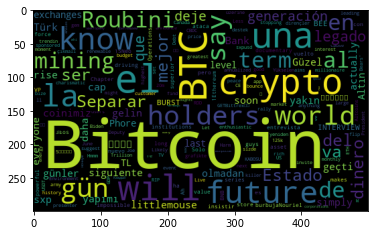

In [47]:
allwords=''.join([i for i in df1['Tweets']])
cloud=wc(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)
plt.imshow(cloud)